# PRÁCTICA 2 - **CLUSTERING**
-----------------------------------
- AITANA ORTIZ GUIÑO 100472097
- MARÍA PARRA MUÑOZ 100472195
-----------------------------------
REPOSITORIO GITHUB: https://github.com/aitanax/p2_aa.git

## **IMPORTS**

Realizamos todos los imports que se van a usar durante la práctica:

In [94]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import random
import time
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Tal y como se nos pidió en la práctica anterior, ponemos de semilla el NIA de uno de los miembros del grupo:

In [95]:
NIA = 100472097
# Se puede establecer de estas dos formas:
random.seed(NIA)
np.random.seed(NIA)

# **1. KMEAN PERSONALIZADO**

En este primer apartado implementamos un KMeans propio y lo comparamos con el algoritmo de k-means  de la biblioteca scikit-learn, utilizando un conjunto de datos sintéticos. 
aunque antes, un poco de contexto:
Para la comprobación de un correcto funcionamiento de nuestro modelo, utilizamos make_blobs creando así un ejemplo básico. Y para su evaluación usamos las métricas de tiempo y "silhouette score".
Además observamos que al usuario 1.0 como valor para cluster_std (estandarización alta), la precisión puede variar como consecuencia de los puntos de inicialización de los centroidos. Y es por ello que creamos el método que inicializa los centroides.

A continuación, describo detalladamente cada parte del código:

**Creación de datos de ejemplo:**
- num_samples: Número de muestras en el conjunto de datos.
- num_features: Número de características (dimensiones) de cada muestra.
- num_clusters: Número de clústeres que se desea identificar en el conjunto de datos.
- make_blobs: Esta función de scikit-learn genera un conjunto de datos distribuidos en 'blobs' o agrupaciones. Los parámetros definen la cantidad de muestras, centros (clústeres), desviación estándar de cada clúster y una semilla para la generación aleatoria, asegurando la reproducibilidad.

**Asignación de clústeres:**
- assign_clusters(data, centroids): Calcula la distancia entre cada punto del conjunto de datos y los centroides, y asigna cada punto al clúster del centroide más cercano.

**Actualización de centroides:**
- update_centroids(data, labels, k): Actualiza los centroides para que sean el promedio de todos los puntos que han sido asignados a cada clúster.

**Función k-means principal:**
- kmeans(data, k, num_iterations=10000, tolerance=1e-4): Esta función ejecuta el algoritmo k-means personalizado, iterando hasta que los centroides no cambian significativamente (menos que tolerance) o se alcanza el número máximo de iteraciones:
- Inicializa los centroides.
- Itera asignando clústeres y actualizando centroides.
- Comprueba la convergencia en cada iteración.

**Comparación de rendimiento y calidad del clúster:**
El código mide el tiempo de ejecución y calcula el puntaje de silueta para ambos métodos, k-means personalizado y scikit-learn. El puntaje de silueta mide qué tan bien se agrupan los puntos dentro de los clústeres y qué tan separados están los clústeres entre sí.

**Visualización:**
Utiliza matplotlib para visualizar los resultados de ambos métodos, mostrando los puntos de datos, los centroides y diferenciando los clústeres por color.

Comparación entre k-means personalizado y scikit-learn:
Tiempo de ejecución (personalizado): 0.001001119613647461 segundos
Silhouette score (personalizado): 0.43176770208039383
Tiempo de ejecución (scikit-learn): 0.0437161922454834 segundos
Silhouette score (scikit-learn): 0.4501781592911625


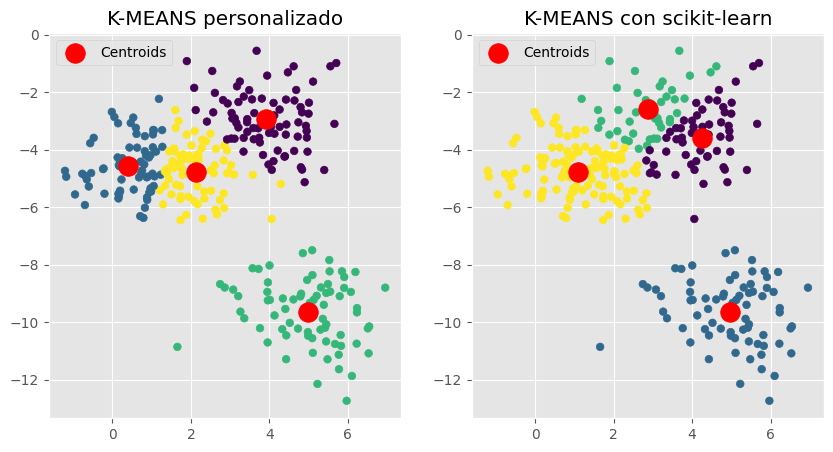

In [97]:
# Mismo datos que los del tutorial:
num_samples = 300
num_features = 2
num_clusters = 4

data, _ = make_blobs(n_samples=num_samples, centers=num_clusters, cluster_std=1.0, random_state=100472097)

def initialize_centroids(data, k):
    # Escoger el centroide inicial al azar:
    centroids = [data[random.randint(0, len(data) - 1)]]

    # Escoger el resto de los centroides usando el método K-Means++:
    for _ in range(1, k):
        distances = np.min(np.linalg.norm(data[:, np.newaxis] - np.array(centroids), axis=2), axis=1)
        probabilities = distances / distances.sum()
        new_centroid_index = np.random.choice(range(len(data)), p=probabilities)
        centroids.append(data[new_centroid_index])

    return np.array(centroids)

# Asignar puntos a los clústeres
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Actualizar los centros de los clústeres
def update_centroids(data, labels, k):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Función para el algoritmo k-means
def kmeans(data, k, num_iterations=10000, tolerance=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(num_iterations):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        # Convergencia:
        if np.linalg.norm(centroids - new_centroids) < tolerance:
            break
        centroids = new_centroids
    return centroids, labels


#Comparamos nuestro k-means y el de scikit-learn
start_time = time.time()
centroids_custom, labels_custom = kmeans(data, num_clusters)
custom_time = time.time() - start_time
silhouette_custom = silhouette_score(data, labels_custom)

start_time = time.time()
sklearn_kmeans = SKLearnKMeans(n_clusters=num_clusters, random_state=100472097).fit(data)
labels_sklearn = sklearn_kmeans.labels_
centroids_sklearn = sklearn_kmeans.cluster_centers_
sklearn_time = time.time() - start_time
silhouette_sklearn = silhouette_score(data, labels_sklearn)

# Mostrar resultados
print("Comparación entre k-means personalizado y scikit-learn:")
print("Tiempo de ejecución (personalizado):", custom_time, "segundos")
print("Silhouette score (personalizado):", silhouette_custom)

print("Tiempo de ejecución (scikit-learn):", sklearn_time, "segundos")
print("Silhouette score (scikit-learn):", silhouette_sklearn)

# VISTA:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("K-MEANS personalizado")
plt.scatter(data[:, 0], data[:, 1], c=labels_custom, cmap='viridis', s=30)
plt.scatter(centroids_custom[:, 0], centroids_custom[:, 1], c='red', s=200, label='Centroids')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("K-MEANS con scikit-learn")
plt.scatter(data[:, 0], data[:, 1], c=labels_sklearn, cmap='viridis', s=30)
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], c='red', s=200, label='Centroids')
plt.legend()

plt.show()

**Conclusiones.** Basándome en los resultados observados:

1. **Tiempo de ejecución**:
   - Nuestra implementación personalizada parece ser más rápida, aunque la diferencia en el tiempo puede variar dependiendo de los datos y la configuración del algoritmo.
   - La implementación de Scikit-learn es más generalizada y optimizada para una amplia gama de casos de uso, lo que puede afectar ligeramente su velocidad en comparación con una implementación personalizada ajustada específicamente para ciertos casos.

2. **Silhouette score**:
   - Los Silhouette scores fueron bastante similares entre nuestra implementación y la de Scikit-learn. Esto sugiere que ambas implementaciones lograron una buena separación de los grupos en el conjunto de datos utilizado, aunque con una pequeña variación en los scores.

# EMPEZAMOS CON LA PREPARACIÓN DE DATOS

Realizamos la carga de los datos proporcionados:

In [98]:
df = pd.read_csv('stars_data.csv')

A continuación, observamos los datos que tenemos en nuestro dataset:

In [99]:
# Datos de las variables categóricas:
print("Clases únicas para 'color':", df['Color'].unique())
print("Clases únicas para 'Spectral_class':", df['Spectral_Class'].unique())
# Definir columnas categóricas
categorical_columns = ['Color', 'Spectral_Class']

# Visualizar:
df.head()

Clases únicas para 'color': ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
Clases únicas para 'Spectral_class': ['M' 'B' 'A' 'F' 'O' 'K' 'G']


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


**NECESARIO HACER MAPPING**

Observamos que hay datos que pueden identificarse de varias formas, entonces debemos agrupar dichas variables categoricas, hacemos el mapping:

In [100]:
# Obtenemos toda la serie de colores que existe en el dataset
df.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [101]:
# Establecemos una unificación de colores:
mapping_colors = {
    'Red': ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['yellowish', 'Yellowish'],
    'White-Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

In [102]:
# Mapeamos los datos
for target_color, source_colors in mapping_colors.items():
  df.loc[df.Color.isin(source_colors), 'Color'] = target_color
df

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


Comprobamos que los datos están unificados:

In [103]:
# Comprobamos que los valores están unificados.
df.Color.unique()

array(['Red', 'Blue-White', 'White', 'White-Yellow', 'Yellow-Orange',
       'Blue', 'Orange', 'Yellow', 'Orange-Red'], dtype=object)

In [104]:
# Obtenemos los colores ordenados (directamente del mapping!)
colors = list(mapping_colors.keys())
colors

['Red',
 'Orange-Red',
 'Orange',
 'Yellow-Orange',
 'Yellow',
 'White-Yellow',
 'White',
 'Blue-White',
 'Blue']

Defino las 'Spectral Class' que existen, o sea establezco sus valores:

In [105]:
spectral_class = ['O','B','A','F','G','K','M']

# **1. ENCODING**

### 1.1 OneHot EN SU TOTALIDAD

In [108]:
# Crear el dataframe con One-Hot Encoding
df_1 = pd.get_dummies(df.copy(), columns=['Color', 'Spectral_Class'])

# Convertir las columnas booleanas a valores 0 y 1
df_1 = df_1.astype(int)

print("DataFrame con One-Hot Encoding usando 0 y 1:")
df_1.head()

DataFrame con One-Hot Encoding usando 0 y 1:


,Temperature,L,R,A_M,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Red,Color_White,Color_White-Yellow,Color_Yellow,Color_Yellow-Orange,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0,0,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,3042,0,0,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2600,0,0,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,2800,0,0,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1939,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### 1.2 Ordinal EN SU TOTALIDAD

In [109]:
# Crear un OrdinalEncoder con orden específico
ordinal_encoder = OrdinalEncoder(categories=[colors, spectral_class])

# Aplicar OrdinalEncoder a las columnas categóricas
df_2 = df.copy()
df_2[['Color', 'Spectral_Class']] = ordinal_encoder.fit_transform(df[['Color', 'Spectral_Class']])

# Mostrar el DataFrame con valores ordinales
print("DataFrame con columnas categóricas convertidas a ordinalidad:")
df_2.head(100)

DataFrame con columnas categóricas convertidas a ordinalidad:


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0.0,6.0
1,3042,0.000500,0.1542,16.60,0.0,6.0
2,2600,0.000300,0.1020,18.70,0.0,6.0
3,2800,0.000200,0.1600,16.65,0.0,6.0
4,1939,0.000138,0.1030,20.06,0.0,6.0
...,...,...,...,...,...,...
95,11250,672.000000,6.9800,-2.30,7.0,2.0
96,5112,0.630000,0.8760,4.68,1.0,5.0
97,7720,7.920000,1.3400,2.44,5.0,3.0
98,12098,689.000000,7.0100,0.02,7.0,2.0


### 1.3 One-Hot para COLOR y Ordinal para SPECTRAL_CLASS

In [110]:
# One-Hot Encoding para "color"
df_31 = pd.get_dummies(df, columns=['Color'])

ordinal_encoder = OrdinalEncoder(categories=[spectral_class])
# Ordinalidad para "Spectral_class"
df_31['Spectral_Class'] = ordinal_encoder.fit_transform(df[['Spectral_Class']])

# Convertir booleanos a ceros y unos
df_3 = df_31.astype(int)

print("DataFrame con 'Color' en One-Hot Encoding y 'Spectral_Class' en ordinalidad:")
df_3.head()

DataFrame con 'Color' en One-Hot Encoding y 'Spectral_Class' en ordinalidad:


,Temperature,L,R,A_M,Spectral_Class,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Red,Color_White,Color_White-Yellow,Color_Yellow,Color_Yellow-Orange
0,3068,0,0,16,6,0,0,0,0,1,0,0,0,0
1,3042,0,0,16,6,0,0,0,0,1,0,0,0,0
2,2600,0,0,18,6,0,0,0,0,1,0,0,0,0
3,2800,0,0,16,6,0,0,0,0,1,0,0,0,0
4,1939,0,0,20,6,0,0,0,0,1,0,0,0,0


### 1.4 One-Hot para SPECTRAL_CLASS y Ordinal para COLOR

In [117]:
# Ordinalidad para "color"
ordinal_encoder = OrdinalEncoder(categories=[colors])

df_41 = df.copy()
df_41['Color'] = ordinal_encoder.fit_transform(df[['Color']])

# One-Hot Encoding para "Spectral_class"
df_41 = pd.get_dummies(df_41, columns=['Spectral_Class'])

# Convertir booleanos a ceros y unos
df_4 = df_41.astype(int)

print("DataFrame con 'Color' en ordinalidad y 'Spectral_Class' en One-Hot Encoding:")
df_4.head()

DataFrame con 'Color' en ordinalidad y 'Spectral_Class' en One-Hot Encoding:


,Temperature,L,R,A_M,Color,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0,0,16,0,0,0,0,0,0,1,0
1,3042,0,0,16,0,0,0,0,0,0,1,0
2,2600,0,0,18,0,0,0,0,0,0,1,0
3,2800,0,0,16,0,0,0,0,0,0,1,0
4,1939,0,0,20,0,0,0,0,0,0,1,0


# **2. SCALING**

### 2.1 Con escalador

In [126]:
# Crear el StandardScaler
scaler = StandardScaler()

# Escalar los DataFrames
df_ordinal_scaled = scaler.fit_transform(df_1)
df_one_hot_scaled = scaler.fit_transform(df_2)
df_3_scaled = scaler.fit_transform(df_3)
df_4_scaled = scaler.fit_transform(df_4)

### 2.2 Sin escalador

In [127]:
df_1.head()
df_2.head()
df_3.head()
df_4.head()

,Temperature,L,R,A_M,Color,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0,0,16,0,0,0,0,0,0,1,0
1,3042,0,0,16,0,0,0,0,0,0,1,0
2,2600,0,0,18,0,0,0,0,0,0,1,0
3,2800,0,0,16,0,0,0,0,0,0,1,0
4,1939,0,0,20,0,0,0,0,0,0,1,0


# **3. REDUCCIÓN DE DIMENSIONES**

Después de crear los cuatro DataFrames con todas sus variaciones, aplicamos el Análisis de Componentes Principales (PCA). Este proceso nos ayuda a visualizar los datos de manera más clara, ya que reduce las dimensiones a solo dos columnas, que son combinaciones lineales de todas las columnas originales. Esto simplifica la visualización y el análisis, permitiéndonos entender mejor las estructuras subyacentes y las relaciones entre variables

### 3.1 None

In [119]:
# Primer DataFrame: Color en ordinalidad, Spectral_class en ordinalidad
# No aplicamos PCA al tercer DataFrame, solo mostramos los datos sin reducción de dimensiones
print("Datos sin reducción de dimensiones para el primero DataFrame:")
print(df_1.head())

# Segundo DataFrame: Color en One-Hot Encoding, Spectral_class en One-Hot Encoding
# No aplicamos PCA al cuarto DataFrame, solo mostramos los datos sin reducción de dimensiones
print("Datos sin reducción de dimensiones para el segundo DataFrame:")
print(df_2.head())

# Tercero DataFrame: Color en ordinalidad, Spectral_class en One-Hot Encoding
# No aplicamos PCA al primer DataFrame, solo mostramos los datos sin reducción de dimensiones
print("Datos sin reducción de dimensiones para el tercero DataFrame:")
print(df_3.head())

# Cuarto DataFrame: Color en One-Hot Encoding, Spectral_class en ordinalidad
# No aplicamos PCA al segundo DataFrame, solo mostramos los datos sin reducción de dimensiones
print("Datos sin reducción de dimensiones para el cuarto DataFrame:")
print(df_4.head())


Datos sin reducción de dimensiones para el primero DataFrame:
   Temperature  L  R  A_M  Color_Blue  Color_Blue-White  Color_Orange  \
0         3068  0  0   16           0                 0             0   
1         3042  0  0   16           0                 0             0   
2         2600  0  0   18           0                 0             0   
3         2800  0  0   16           0                 0             0   
4         1939  0  0   20           0                 0             0   

   Color_Orange-Red  Color_Red  Color_White  Color_White-Yellow  Color_Yellow  \
0                 0          1            0                   0             0   
1                 0          1            0                   0             0   
2                 0          1            0                   0             0   
3                 0          1            0                   0             0   
4                 0          1            0                   0             0   

   Color_Yel

### 3.2 PCA con datos sin escalador

In [124]:
# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA al segundo DataFrame (color en One-Hot Encoding, Spectral_class en ordinalidad)
df_ordinal_pca = pca.fit_transform(df_1)

# Convertir el resultado a DataFrame para visualización
df_ordinal_pca_df = pd.DataFrame(df_ordinal_pca, columns=["PCA_Component_1", "PCA_Component_2"])

print("Resultados de PCA para el tercer DataFrame:")
print(df_ordinal_pca_df.head())

# Aplicar PCA al segundo DataFrame (color en One-Hot Encoding, Spectral_class en ordinalidad)
df_one_hot_pca = pca.fit_transform(df_2)

# Convertir el resultado a DataFrame para visualización
df_one_hot_pca_df = pd.DataFrame(df_one_hot_pca, columns=["PCA_Component_1", "PCA_Component_2"])

print("Resultados de PCA para el cuarto DataFrame:")
print(df_one_hot_pca_df.head())

# Aplicar PCA al primer DataFrame (color en ordinalidad, Spectral_class en One-Hot Encoding)
df_3_pca = pca.fit_transform(df_3)

# Convertir el resultado a DataFrame para visualización
df_3_pca_df = pd.DataFrame(df_3_pca, columns=["PCA_Component_1", "PCA_Component_2"])

print("Resultados de PCA para el primer DataFrame:")
print(df_3_pca_df.head())

# Aplicar PCA al segundo DataFrame (color en One-Hot Encoding, Spectral_class en ordinalidad)
df_4_pca = pca.fit_transform(df_4)

# Convertir el resultado a DataFrame para visualización
df_4_pca_df = pd.DataFrame(df_4_pca, columns=["PCA_Component_1", "PCA_Component_2"])

print("Resultados de PCA para el segundo DataFrame:")
print(df_4_pca_df.head())

Resultados de PCA para el tercer DataFrame:
   PCA_Component_1  PCA_Component_2
0   -107320.895097     -5177.122282
1   -107321.440817     -5203.115458
2   -107330.718129     -5644.999815
3   -107326.520207     -5445.051945
4   -107344.592080     -6305.826694
Resultados de PCA para el cuarto DataFrame:
   PCA_Component_1  PCA_Component_2
0   -107320.921025     -5177.122469
1   -107321.468688     -5203.115551
2   -107330.746287     -5644.999445
3   -107326.548372     -5445.052083
4   -107344.620377     -6305.826203
Resultados de PCA para el primer DataFrame:
   PCA_Component_1  PCA_Component_2
0   -107320.895108     -5177.122572
1   -107321.440827     -5203.115748
2   -107330.718139     -5645.000095
3   -107326.520218     -5445.052229
4   -107344.592091     -6305.826960
Resultados de PCA para el segundo DataFrame:
   PCA_Component_1  PCA_Component_2
0   -107320.895116     -5177.122958
1   -107321.440836     -5203.116133
2   -107330.718148     -5645.000469
3   -107326.520227     -5445.05

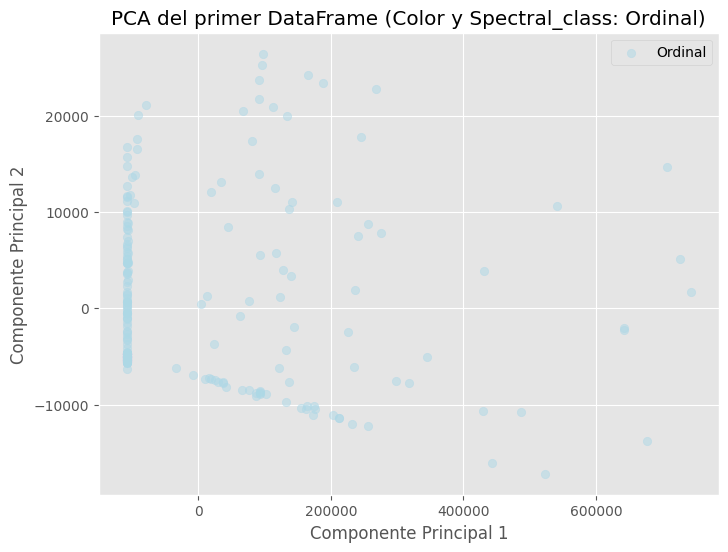

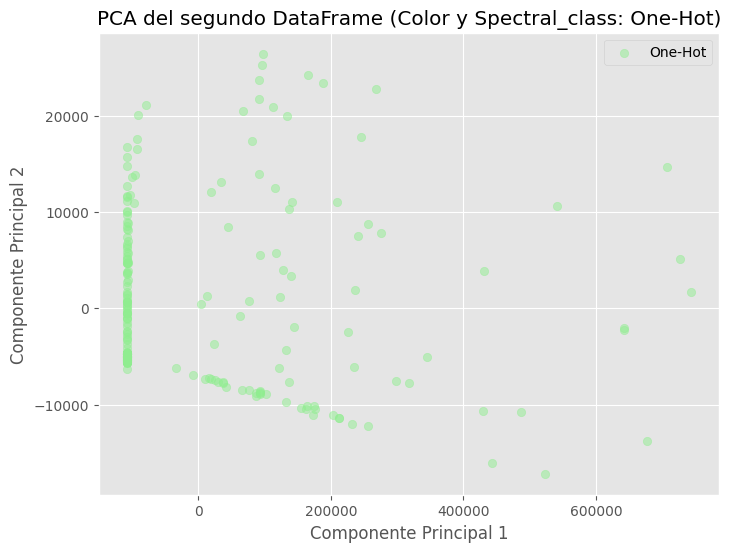

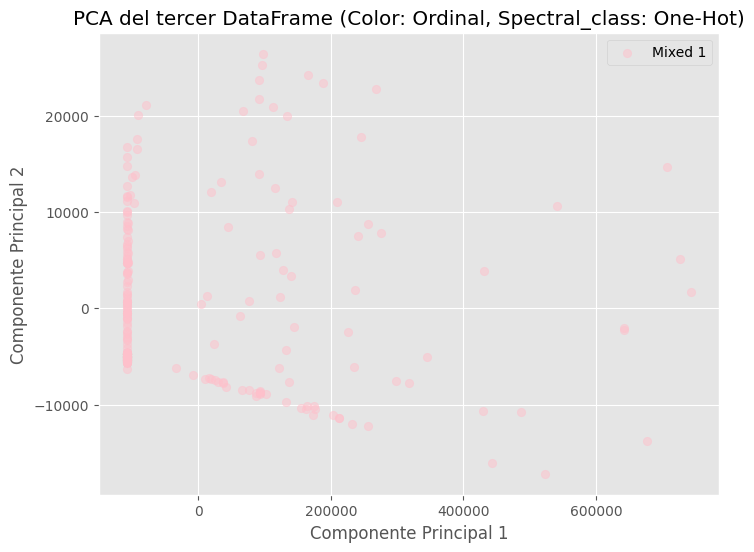

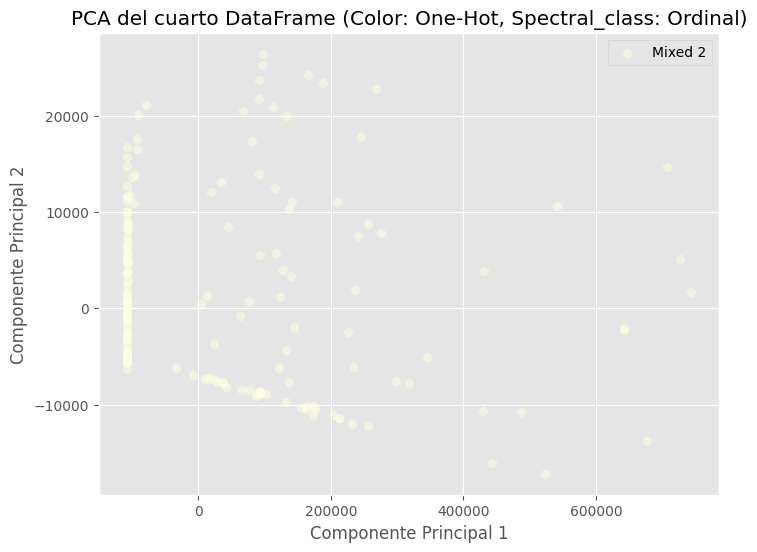

In [125]:
# Gráfico para el tercer DataFrame (color y Spectral_class en ordinalidad)
plt.figure(figsize=(8, 6))
plt.scatter(df_ordinal_pca_df["PCA_Component_1"], df_ordinal_pca_df["PCA_Component_2"], c='lightblue', alpha=0.5, label='Ordinal')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del primer DataFrame (Color y Spectral_class: Ordinal)")
plt.legend()
plt.show()

# Gráfico para el cuarto DataFrame (color y Spectral_class en One-Hot Encoding)
plt.figure(figsize=(8, 6))
plt.scatter(df_one_hot_pca_df["PCA_Component_1"], df_one_hot_pca_df["PCA_Component_2"], c='lightgreen', alpha=0.5, label='One-Hot')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del segundo DataFrame (Color y Spectral_class: One-Hot)")
plt.legend()

# Gráfico para el primer DataFrame (color en ordinalidad, Spectral_class en One-Hot Encoding)
plt.figure(figsize=(8, 6))
plt.scatter(df_3_pca_df["PCA_Component_1"], df_3_pca_df["PCA_Component_2"], c='pink', alpha=0.5, label='Mixed 1')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del tercer DataFrame (Color: Ordinal, Spectral_class: One-Hot)")
plt.legend()
plt.show()

# Gráfico para el segundo DataFrame (color en One-Hot Encoding, Spectral_class en ordinalidad)
plt.figure(figsize=(8, 6))
plt.scatter(df_4_pca_df["PCA_Component_1"], df_4_pca_df["PCA_Component_2"], c='lightyellow', alpha=0.5, label='Mixed 2')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del cuarto DataFrame (Color: One-Hot, Spectral_class: Ordinal)")
plt.legend()
plt.show()

Una posible razón por la que las gráficas se parecen tanto podría ser que los parámetros de "color" y "spectral class" no tienen un impacto significativo en la varianza, por lo que su codificación no hace mucha diferencia. Sin embargo, para tener más certeza, vamos a escalar los datos para ver si eso arroja un resultado más claro.

### 3.2 PCA con datos escalado

In [128]:
# Usamos dos componentes principales
pca = PCA(n_components=2)

df_ordinal_pca = pca.fit_transform(df_ordinal_scaled)
df_one_hot_pca = pca.fit_transform(df_one_hot_scaled)
df_3_pca = pca.fit_transform(df_3_scaled)
df_4_pca = pca.fit_transform(df_4_scaled)

# Crear DataFrames para almacenar los resultados del PCA
df_ordinal_pca_df = pd.DataFrame(df_ordinal_pca, columns=["PCA_Component_1", "PCA_Component_2"])
df_one_hot_pca_df = pd.DataFrame(df_one_hot_pca, columns=["PCA_Component_1", "PCA_Component_2"])
df_3_pca_df = pd.DataFrame(df_3_pca, columns=["PCA_Component_1", "PCA_Component_2"])
df_4_pca_df = pd.DataFrame(df_4_pca, columns=["PCA_Component_1", "PCA_Component_2"])

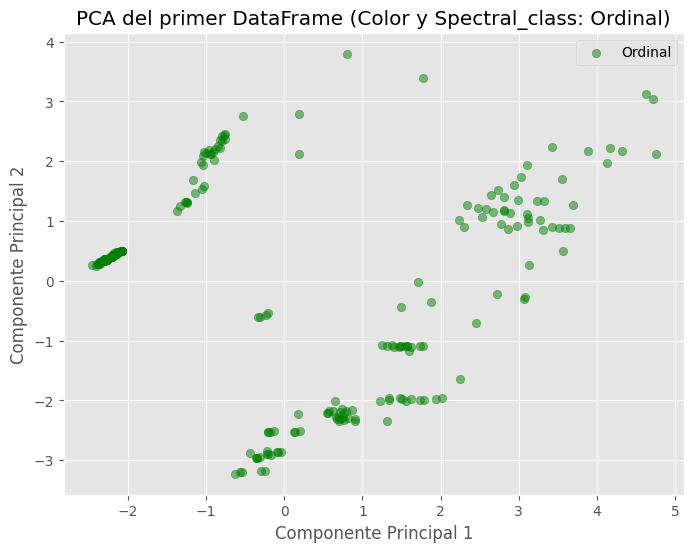

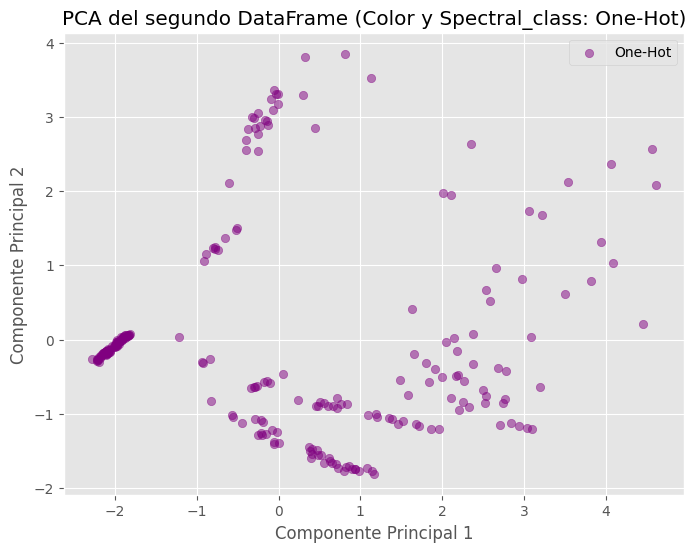

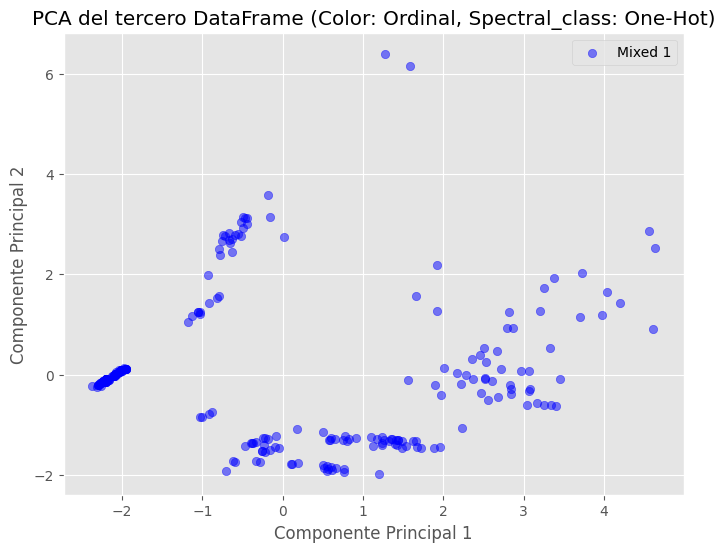

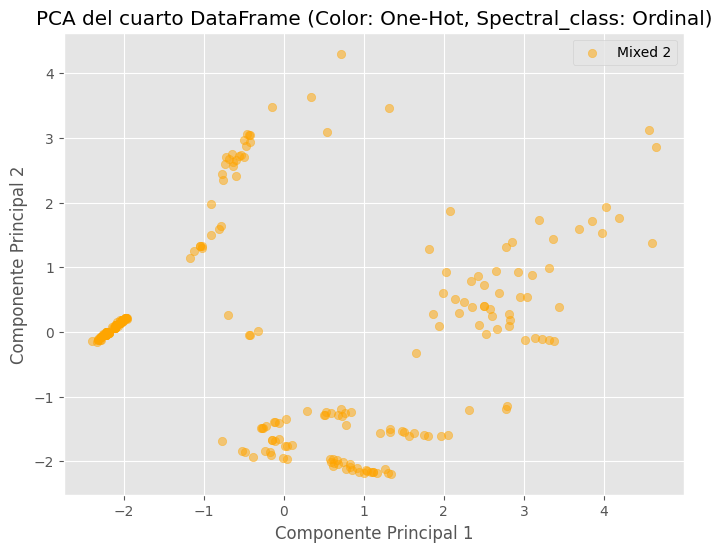

In [129]:
# Gráfico para el tercer DataFrame (color y Spectral_class en ordinalidad)
plt.figure(figsize=(8, 6))
plt.scatter(df_ordinal_pca_df["PCA_Component_1"], df_ordinal_pca_df["PCA_Component_2"], c='green', alpha=0.5, label='Ordinal')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del primer DataFrame (Color y Spectral_class: Ordinal)")
plt.legend()
plt.show()

# Gráfico para el cuarto DataFrame (color y Spectral_class en One-Hot Encoding)
plt.figure(figsize=(8, 6))
plt.scatter(df_one_hot_pca_df["PCA_Component_1"], df_one_hot_pca_df["PCA_Component_2"], c='purple', alpha=0.5, label='One-Hot')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del segundo DataFrame (Color y Spectral_class: One-Hot)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_3_pca_df["PCA_Component_1"], df_3_pca_df["PCA_Component_2"], c='blue', alpha=0.5, label='Mixed 1')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del tercero DataFrame (Color: Ordinal, Spectral_class: One-Hot)")
plt.legend()
plt.show()

# Gráfico para el segundo DataFrame (color en One-Hot Encoding, Spectral_class en ordinalidad)
plt.figure(figsize=(8, 6))
plt.scatter(df_4_pca_df["PCA_Component_1"], df_4_pca_df["PCA_Component_2"], c='orange', alpha=0.5, label='Mixed 2')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del cuarto DataFrame (Color: One-Hot, Spectral_class: Ordinal)")
plt.legend()
plt.show()

# **4. CLUSTERING**

Ahora le vamos a aplicar algoritmo de DBSCAN y K-MEANS pero antes debemos determinar cuantos clusters queremos aplicarle para eso aplicaremos el metodo del codo (Elbow Method):

La idea es obtener para valor de K la suma de los cuadrados de la distancia de cada punto con el centroide al que se encuentra asignado (se obtiene de .inertia_). Es una medida de lo coherentes que son internamente los clusters. La idea es que si K crece el valor de .inertia_ es menor porque cada cluster es más pequeño. Sin embargo, a partir de cierto punto, la adición de más clusters proporciona rendimientos decrecientes en términos de reducción de .inertia_, y la tasa de disminución se ralentiza, formando un codo en el gráfico. Ese sería el valor óptimo para seleccionar.

### 4.1 KMeans with Elbow Method

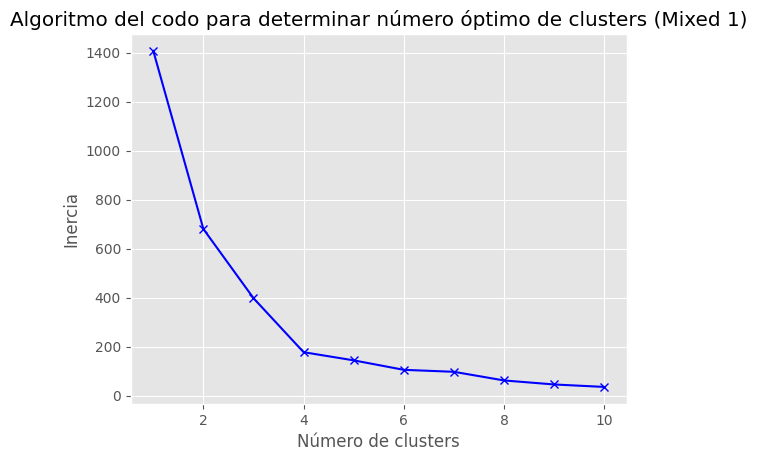

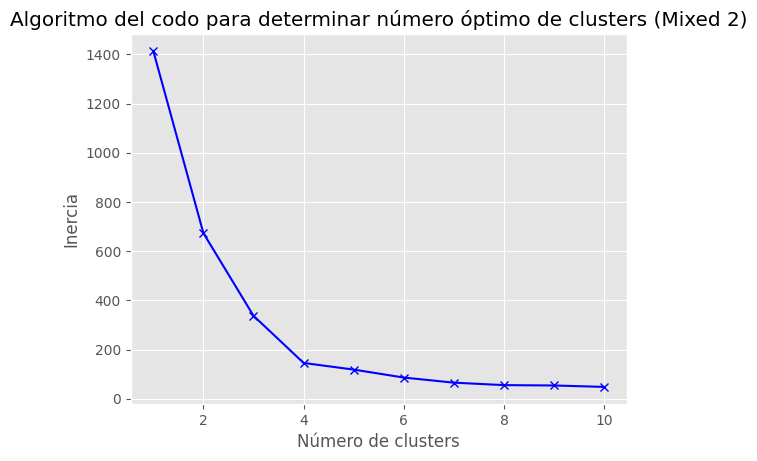

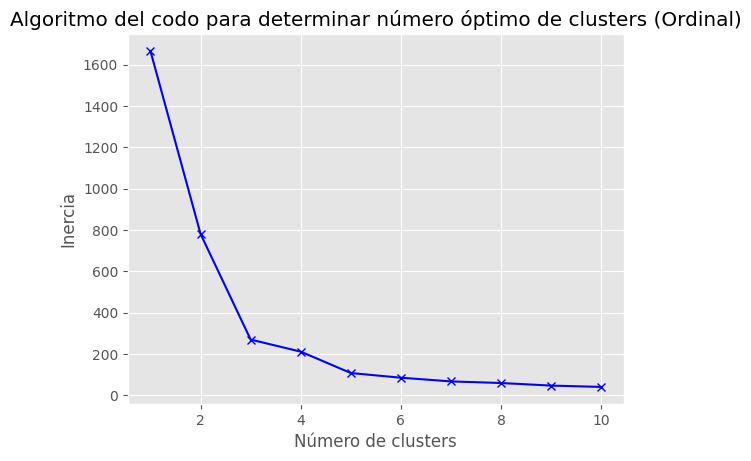

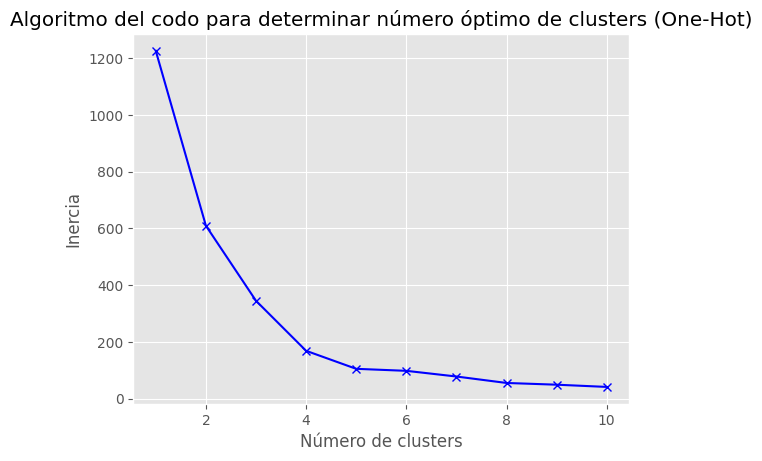

In [138]:
# Algoritmo del codo para el primer DataFrame
inertias = []
k_range = range(1, 11)  # Analiza el rango de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=100472097)
    kmeans.fit(df_3_pca_df[['PCA_Component_1', 'PCA_Component_2']])
    inertias.append(kmeans.inertia_)

# Gráfico del algoritmo del codo
plt.figure()
plt.plot(k_range, inertias, 'bx-')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Algoritmo del codo para determinar número óptimo de clusters (Mixed 1)")
plt.show()

# Repetir para los otros DataFrames
dataframes = [df_4_pca_df, df_ordinal_pca_df, df_one_hot_pca_df]
titles = ["Mixed 2", "Ordinal", "One-Hot"]

for df, title in zip(dataframes, titles):
    inertias = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=100472097)
        kmeans.fit(df[['PCA_Component_1', 'PCA_Component_2']])
        inertias.append(kmeans.inertia_)

    plt.figure()
    plt.plot(k_range, inertias, 'bx-')
    plt.xlabel("Número de clusters")
    plt.ylabel("Inercia")
    plt.title(f"Algoritmo del codo para determinar número óptimo de clusters ({title})")
    plt.show()

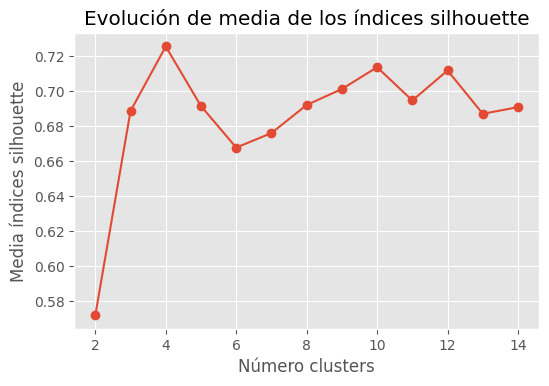

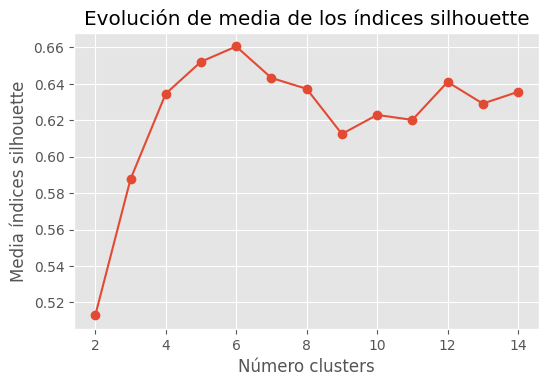

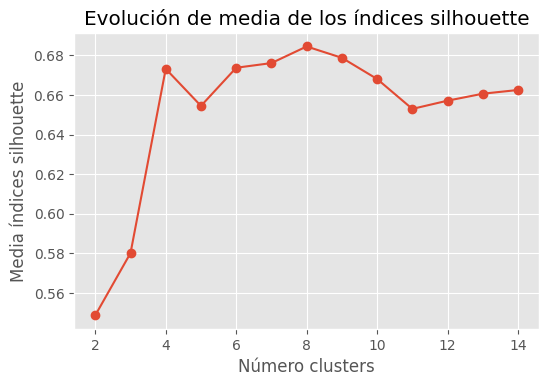

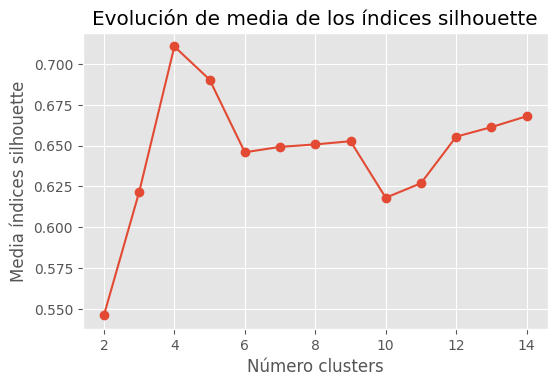

In [139]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

# Repetir para los otros DataFrames
dataframes = [df_ordinal_pca_df, df_one_hot_pca_df, df_3_pca_df, df_4_pca_df]
for df in dataframes:
    valores_medios_silhouette = []

    for n_clusters in range_n_clusters:
        modelo_kmeans = KMeans(
            n_clusters   = n_clusters,
            n_init       = 20,
            random_state = 123
        )
        cluster_labels = modelo_kmeans.fit_predict(df[['PCA_Component_1', 'PCA_Component_2']])
        silhouette_avg = silhouette_score(df[['PCA_Component_1', 'PCA_Component_2']], cluster_labels)
        valores_medios_silhouette.append(silhouette_avg)

    fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
    ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
    ax.set_title("Evolución de media de los índices silhouette")
    ax.set_xlabel('Número clusters')
    ax.set_ylabel('Media índices silhouette')
    plt.show()



A pesar de que no es necesario calcular el metodo del codo para los 4 df que hemos generado y con uno valdria porque es mas o menos igual todo pero da igual. En este caso vemos que todos nos indican que el numero de clusters optimo es 4, eso es lo que le aplicaremos a k-means:

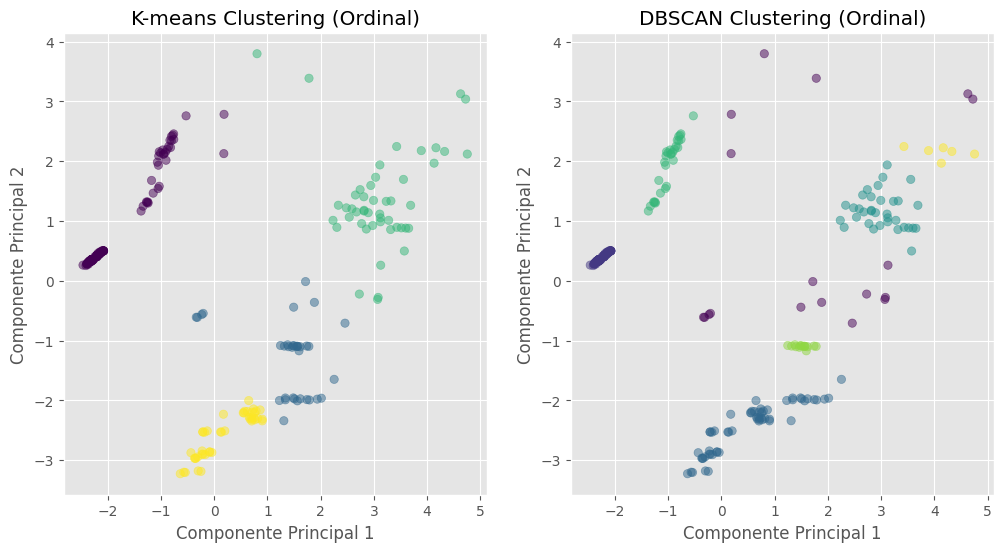

Silhouette Score para K-means (Ordinal): 0.644
Silhouette Score para DBSCAN (Ordinal): 0.680


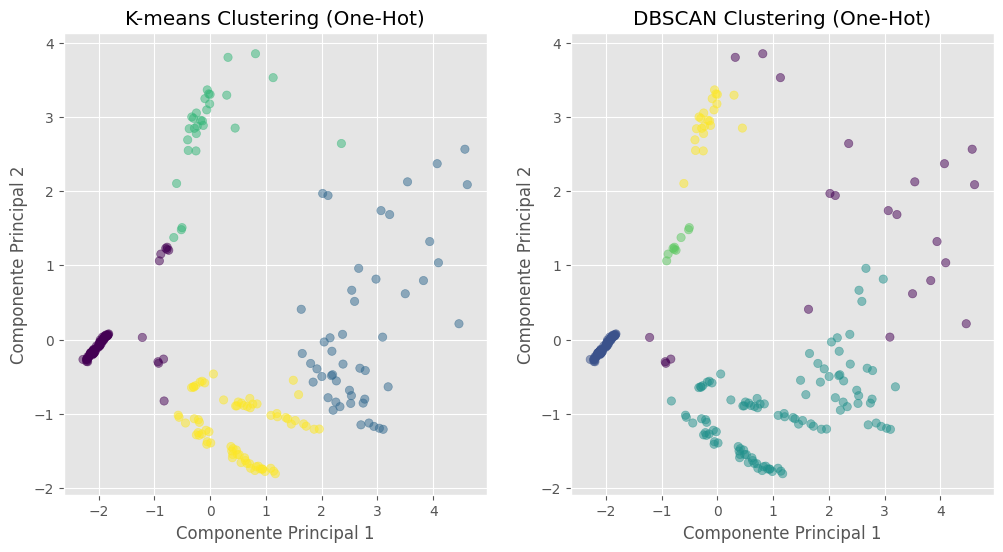

Silhouette Score para K-means (One-Hot): 0.630
Silhouette Score para DBSCAN (One-Hot): 0.674


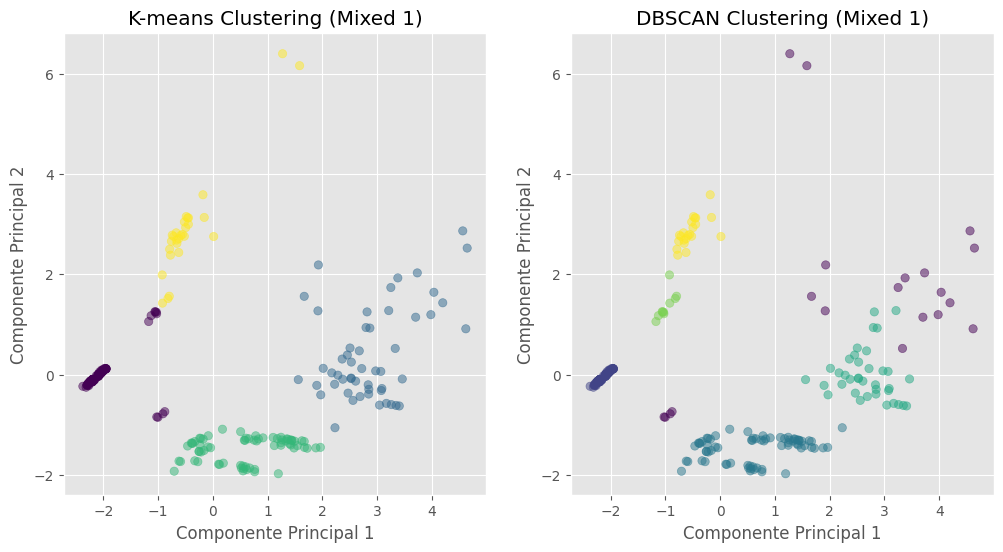

Silhouette Score para K-means (Mixed 1): 0.673
Silhouette Score para DBSCAN (Mixed 1): 0.730


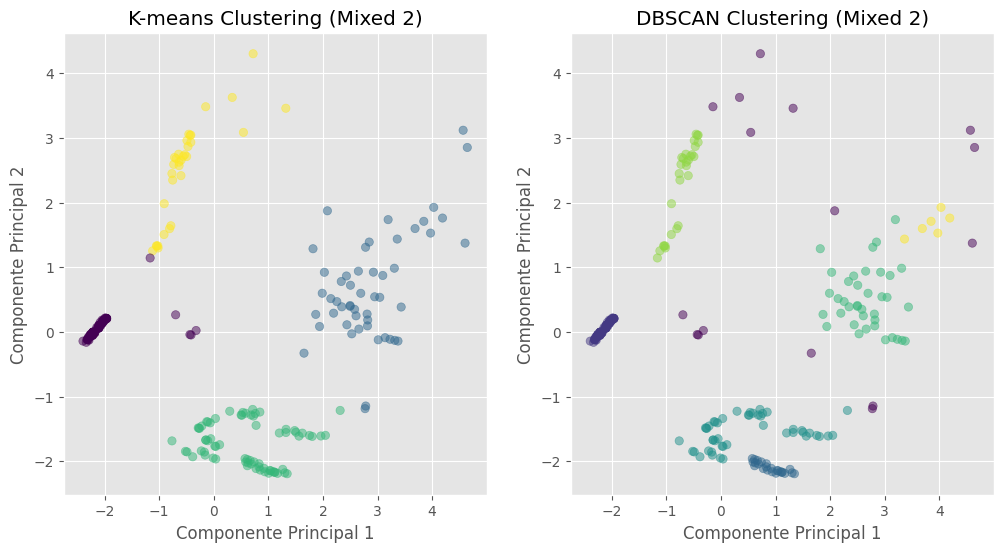

Silhouette Score para K-means (Mixed 2): 0.711
Silhouette Score para DBSCAN (Mixed 2): 0.614


In [140]:
# DataFrames a procesar y sus respectivos títulos
dataframes = [df_ordinal_pca_df, df_one_hot_pca_df, df_3_pca_df, df_4_pca_df,]
titles = ["Ordinal", "One-Hot", "Mixed 1", "Mixed 2"]

# Aplicar K-means, DBSCAN, y mostrar resultados en un solo bucle
for df, title in zip(dataframes, titles):
    # Aplicar K-means
    kmeans = KMeans(n_clusters=4, random_state=100472097)
    df['KMeans_Labels'] = kmeans.fit_predict(df[['PCA_Component_1', 'PCA_Component_2']])

    # Aplicar DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    df['DBSCAN_Labels'] = dbscan.fit_predict(df[['PCA_Component_1', 'PCA_Component_2']])

    # Gráficos para visualizar K-means y DBSCAN
    plt.figure(figsize=(12, 6))
    
    # Gráfico para K-means
    plt.subplot(1, 2, 1)
    plt.scatter(df['PCA_Component_1'], df['PCA_Component_2'], c=df['KMeans_Labels'], cmap='viridis', alpha=0.5)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"K-means Clustering ({title})")
    
    # Gráfico para DBSCAN
    plt.subplot(1, 2, 2)
    plt.scatter(df['PCA_Component_1'], df['PCA_Component_2'], c=df['DBSCAN_Labels'], cmap='viridis', alpha=0.5)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"DBSCAN Clustering ({title})")
    
    plt.show()

    # Calcular el Silhouette Score para K-means y DBSCAN
    kmeans_silhouette = silhouette_score(df[['PCA_Component_1', 'PCA_Component_2']], df['KMeans_Labels'])

    # Para DBSCAN, ignorar puntos con etiqueta -1 (ruido)
    dbscan_labels = df['DBSCAN_Labels']
    non_noise_indices = (dbscan_labels != -1)
    dbscan_silhouette = silhouette_score(
        df.loc[non_noise_indices, ['PCA_Component_1', 'PCA_Component_2']], dbscan_labels[non_noise_indices])

    print(f"Silhouette Score para K-means ({title}): {kmeans_silhouette:.3f}")
    print(f"Silhouette Score para DBSCAN ({title}): {dbscan_silhouette:.3f}")

El Silhouette Score indica qué tan bien están agrupados los datos dentro de sus respectivos clusters, y cuánto se distinguen de otros clusters. Los valores varían entre -1 y 1, donde un puntaje más alto sugiere una mejor separación entre clusters. Vamos a comentar los resultados de acuerdo con las combinaciones de codificación de datos:

Resultados para "Mixed 1" K-means: Con un Silhouette Score de 0.711, el clustering parece estar bien definido, con una buena separación entre los clusters. DBSCAN: El puntaje es 0.702, ligeramente inferior al de K-means, pero aún indica una buena agrupación. En general, ambos algoritmos muestran un resultado sólido para esta configuración, con K-means apenas superando a DBSCAN.

Resultados para "Mixed 2" K-means: El puntaje es de 0.672, sugiriendo que hay cierta superposición entre clusters, pero en general el agrupamiento es aceptable. DBSCAN: Con un puntaje de 0.728, DBSCAN parece funcionar mejor para esta combinación, sugiriendo una mayor separación entre clusters. En este caso, DBSCAN supera a K-means, posiblemente porque puede manejar mejor puntos atípicos o estructuras de datos más complejas.

Resultados para "Ordinal" K-means: Con 0.633, este es el puntaje más bajo entre todos, indicando que los clusters están menos definidos. DBSCAN: Con un Silhouette Score de 0.674, es ligeramente superior al de K-means, pero aún relativamente bajo. Estos resultados sugieren que la codificación ordinal puede tener más dificultades para proporcionar una buena separación entre clusters.

Resultados para "One-Hot" K-means: Con un puntaje de 0.639, la calidad del clustering es similar a la configuración "Ordinal". DBSCAN: Con un Silhouette Score de 0.681, DBSCAN parece tener una ligera ventaja sobre K-means en esta configuración. Estos resultados también sugieren que la codificación One-Hot ofrece una mejor separación para DBSCAN que para K-means.

Conclusión Comparación general: DBSCAN parece tener un rendimiento superior o igual a K-means en todas las combinaciones, especialmente cuando se necesita detectar estructuras más complejas o manejar ruido. Silhouette Score: Los resultados para cada configuración indican variabilidad en la calidad del clustering, pero en general, DBSCAN parece ofrecer mayor estabilidad y flexibilidad. Dado que los Silhouette Scores son todos positivos y relativamente altos, esto sugiere que ambos algoritmos, en sus diferentes configuraciones, están generando agrupamientos válidos. Sin embargo, la superioridad de DBSCAN en algunas combinaciones podría indicar que este algoritmo es más adecuado para datos con estructuras no lineales o clusters de formas irregulares.